참조 : https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb
https://gist.github.com/mkocabas/a6177fc00315403d31572e17700d7fd9
https://colab.research.google.com/github/ak9250/SPADE-colab/blob/master/SPADE.ipynb#scrollTo=mEbi6B1qHfNL

# Download COCO dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir coco
%cd coco

/content/coco


In [3]:
!mkdir images
%cd images

/content/coco/images


In [4]:
%%time
# !wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
# !wget http://images.cocodataset.org/zips/test2017.zip
# !wget http://images.cocodataset.org/zips/unlabeled2017.zip

--2021-05-10 06:24:48--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.100.3
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.100.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  28.5MB/s    in 20s     

2021-05-10 06:25:08 (38.3 MB/s) - ‘val2017.zip’ saved [815585330/815585330]

CPU times: user 255 ms, sys: 51.8 ms, total: 307 ms
Wall time: 20.5 s


In [5]:
%%time
# !unzip train2017.zip
# !rm train2017.zip
!unzip val2017.zip
!rm val2017.zip
# !unzip test2017.zip
# !rm test2017.zip
# !unzip unlabeled2017.zip
# !rm unlabeled2017.zip 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 ext

In [8]:
%cd ..

/content/coco


In [9]:
!mkdir annotations
%cd annotations

mkdir: cannot create directory ‘annotations’: File exists
/content/coco/annotations


In [10]:
%%time
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
!wget http://images.cocodataset.org/annotations/image_info_test2017.zip
!wget http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip

--2021-05-10 06:26:39--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.204.227
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.204.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.8MB/s    in 2.5s    

2021-05-10 06:26:42 (96.8 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

--2021-05-10 06:26:42--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.192.89
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.192.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotati

In [11]:
%%time
!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip
!unzip stuff_annotations_trainval2017.zip
!rm stuff_annotations_trainval2017.zip
!unzip image_info_test2017.zip
!rm image_info_test2017.zip
!unzip image_info_unlabeled2017.zip
!rm image_info_unlabeled2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  
Archive:  stuff_annotations_trainval2017.zip
 extracting: annotations/stuff_train2017_pixelmaps.zip  
 extracting: annotations/stuff_val2017_pixelmaps.zip  
  inflating: annotations/stuff_val2017.json  
  inflating: annotations/stuff_train2017.json  
   creating: annotations/deprecated-challenge2017/
  inflating: annotations/deprecated-challenge2017/val-ids.txt  
  inflating: annotations/deprecated-challenge2017/train-ids.txt  
Archive:  image_info_test2017.zip
  inflating: annotations/image_info_test-dev2017.json  
  inflating: annotations/image_info_test2017.json  
Archive:  image_info_unlabeled2017.zip
  inflating: annotations/image

# run API

In [12]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [31]:
dataDir = '..'
dataType = 'val2017'
annFile = '{}/annotations/annotations/instances_{}.json'.format(dataDir,dataType)

In [32]:
%cd annotations

/content/coco/annotations


In [33]:
#initialize COCO api for instance annotations
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.98s)
creating index...
index created!


In [35]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print(type(nms))
print('COCO categories:\n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print(type(nms))
print('COCO supercategories: \n{}'.format(' '.join(nms)))

<class 'list'>
COCO categories:
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

<class 'set'>
COCO supercategories: 
electronic person outdoor furniture indoor accessory kitchen food animal appliance vehicle sports


In [45]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds);
imgIds = coco.getImgIds(imgIds=[324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)

{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


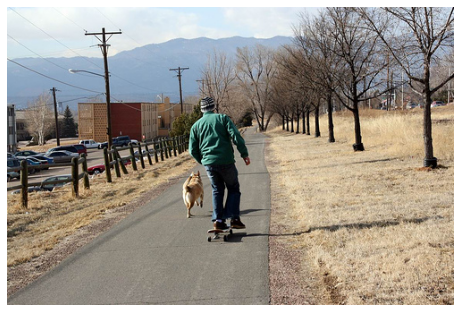

In [41]:
#load and display image
# I = io.imread('%s/imges/%s/%s'%(dataDir, dataType, img['file_name]))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

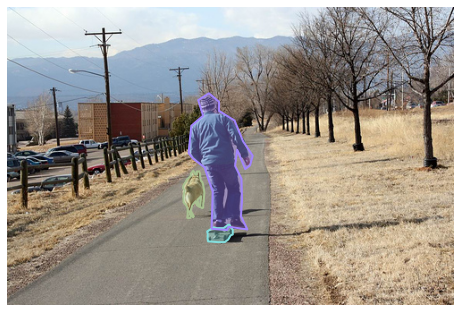

In [42]:
#load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [44]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/annotations/person_keypoints_{}.json'.format(dataDir, dataType)
coco_kps = COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


* gca() --- current axes 반환 (matplotlib.axes.Axes instance)

* gcf() --- current figure 반환 (matplotlib.figure.Figure instance)


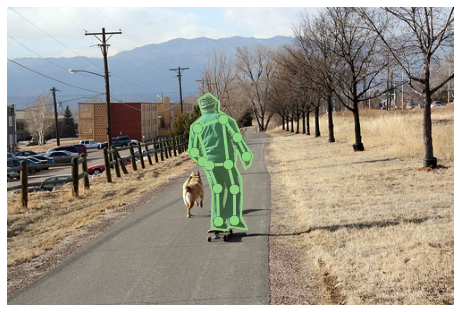

In [48]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [49]:
#initialize COCO api for caption annotations
annFile = '{}/annotations/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


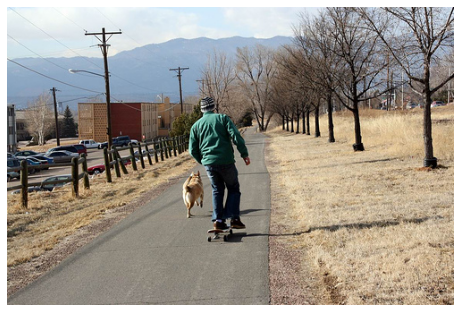

In [50]:
#load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()